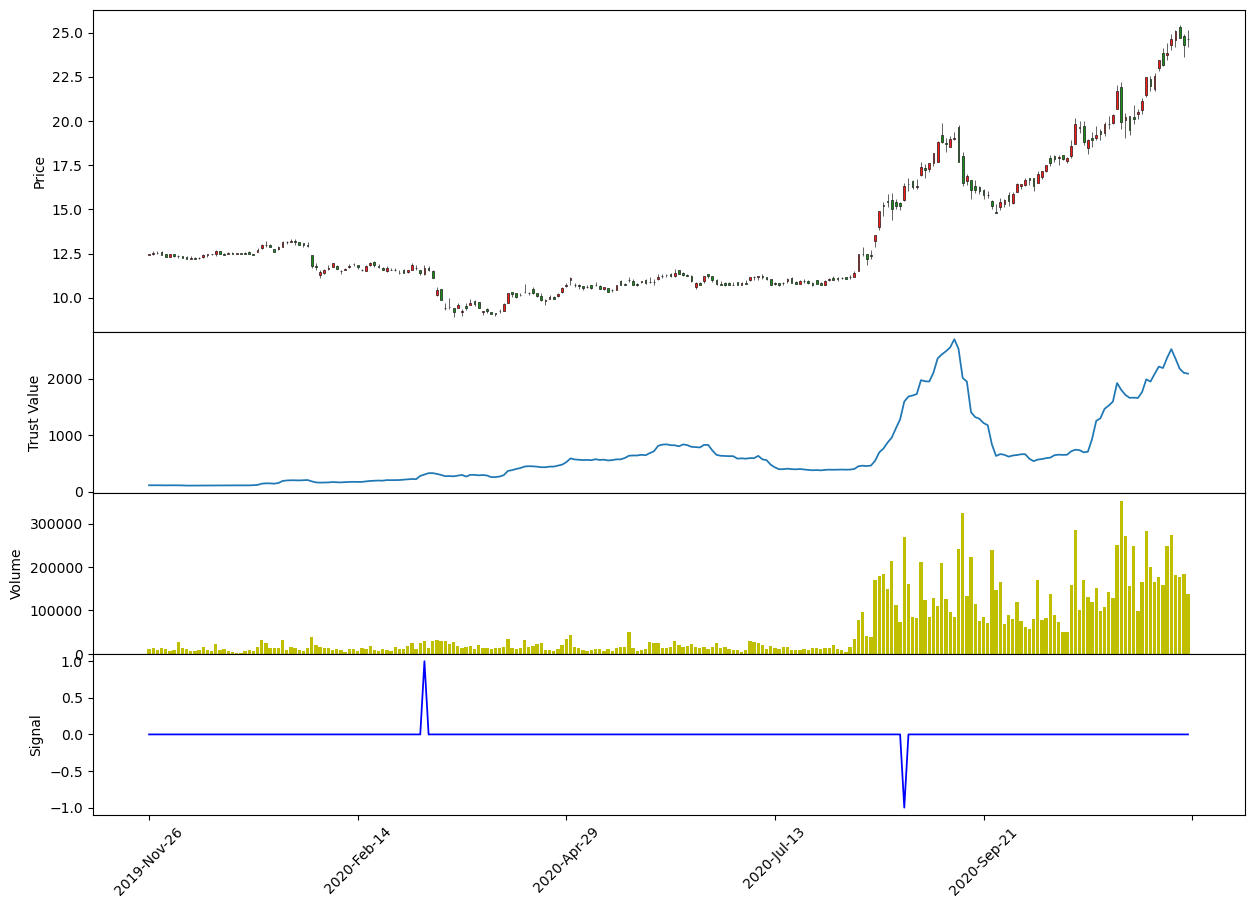

In [60]:
import numpy as np
import pandas as pd
import mplfinance as mpf

stocks = pd.read_csv('2603.csv')
trust = pd.read_csv('2603_trust_value.csv')

stocks = stocks.head(250)
trust = trust.head(250)

stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
trust = trust.set_index(pd.DatetimeIndex(trust["Date"]))

stock_volume = [line for line in stocks['Volume']]
trust_volume = [line for line in trust['TrustValue']]


flag =1
buy =0
signal_buy = []
for i in trust_volume:
    if ((i >= 1300 or i<=200) and flag == 0):
        signal_buy.append(-1)
        flag = 1
    elif i >= 300 and flag == 1 and buy==0:
        signal_buy.append(1)
        flag = 0
        buy=1
    else: 
        signal_buy.append(0)

colorSet = mpf.make_marketcolors(up='r',down = 'g')
styleSet = mpf.make_mpf_style(marketcolors = colorSet)
kwargs = dict(type ='candle' ,figscale = 2, style = styleSet)


draw = [
        mpf.make_addplot(trust_volume, panel = 1,  ylabel = 'Trust Value'),
        mpf.make_addplot(stock_volume, type = 'bar', panel = 2, color = 'y', ylabel = 'Volume'),
        mpf.make_addplot(signal_buy,panel = 3, color = 'b', ylabel = 'Signal')
       ]

mpf.plot(stocks ,  **kwargs, addplot =draw,panel_ratios = (4,2,2,2))